In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

def read_datafiles(path):
    """
    The read_datafiles function reads in Worldbank data from a given path and returns two pandas dataframes, one with years as columns and another with countries as columns.

    Parameters:
        path (str): The path to the directory containing the Worldbank data files.
    
    Returns:
        countries_df (pandas dataframe): A dataframe with countries as columns and indicators as rows.
        years_df (pandas dataframe): A dataframe with years as columns and indicators as rows.
    """
    
    # Read in the Worldbank data
    df = None
    for i in os.listdir(path):
        data_path = os.path.join(path, i)
        temp = pd.read_csv(data_path, skiprows=4, index_col=0)
        if df is not None:
            df = pd.concat([df, temp], axis=0)
        else:
            df = temp
    
    df.drop("Unnamed: 66", axis=1, inplace=True)
    
    
    # Transpose the dataframe to create one with years as columns
    years_df = df.T
    
    # Transpose the dataframe again to create one with countries as columns
    countries_df = years_df.T
    
    # Clean the data
    countries_df.columns.name = ''
    
    return countries_df, years_df

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Read in the data
years_df, countries_df = read_datafiles('poverty_dataset')

# Print the first few rows of the years dataframe
years_df.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,...,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,...,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,...,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,...,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,...,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0


In [3]:
# Print the first few rows of the countries dataframe
countries_df.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
,,,,,,,,,,,,,,,,,,,,,
Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Indicator Name,"Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total",...,"Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)","Population, male (% of total population)"
Indicator Code,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,...,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS,SP.POP.TOTL.MA.ZS
1960,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,50.378869,49.176066,53.906637,49.971137,51.53483,50.742312,49.90985,51.466308,49.511065,49.496126
1961,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,20680653.0,...,51.048631,49.18202,53.760043,49.970713,51.533984,50.754232,49.866488,51.35959,49.491326,49.47172


In [4]:
# Top 2 Poorest Countries
countries = ['Burundi',
            'Central African Republic']

# Get summary statistics for the population indicator for the top two poorest countries
temp = years_df.reset_index()
temp = temp[temp["Country Name"].isin(countries)].set_index(["Country Name", "Indicator Name"]).drop(["Country Code", "Indicator Code"], axis=1)
temp = temp.T.astype(np.number).describe().sort_index(axis=1)
display(temp)

Country Name                                      Burundi  \
Indicator Name Population, female (% of total population)   
count                                           62.000000   
mean                                            50.899356   
std                                              0.362335   
min                                             50.349134   
25%                                             50.649476   
50%                                             50.829485   
75%                                             51.216935   
max                                             51.668737   

Country Name                                                               \
Indicator Name Population, male (% of total population) Population, total   
count                                         62.000000      6.200000e+01   
mean                                          49.100646      6.103770e+06   
std                                            0.362333      2.766845e+06   
min                                           48.331227      2.746628e+06   
25%                                           48.783053      3.769646e+06   
50%                                           49.170524      5.519506e+06   
75%                                           49.350514      7.590861e+06   
max                                           49.650866      1.255121e+07   

Country Name                                                                        \
Indicator Name Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)   
count                                                    4.000000                    
mean                                                    72.850000                    
std                                                      6.031307                    
min                                                     65.100000                    
25%                                                     70.125000                    
50%                                                     73.450000                    
75%                                                     76.175000                    
max                                                     79.400000                    

Country Name                                                                        \
Indicator Name Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)   
count                                                    4.000000                    
mean                                                    97.850000                    
std                                                      0.974679                    
min                                                     96.500000                    
25%                                                     97.550000                    
50%                                                     98.050000                    
75%                                                     98.350000                    
max                                                     98.800000                    

Country Name                     Central African Republic  \
Indicator Name Population, female (% of total population)   
count                                           62.000000   
mean                                            49.949543   
std                                              0.401144   
min                                             49.280060   
25%                                             49.684573   
50%                                             49.862131   
75%                                             50.412182   
max                                             50.598013   

Country Name                                                               \
Indicator Name Population, male (% of total population) Population, total   
count                                         62.000000      6.200000e+01   
mean                                          50.05046

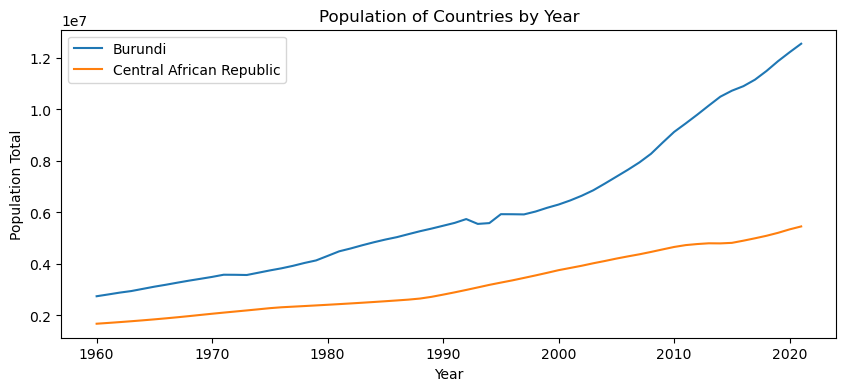

In [5]:
indicator = "Population, total"

temp = years_df.reset_index()
temp = temp[temp["Country Name"].isin(countries)]
temp = temp[temp["Indicator Name"] == indicator].drop(["Country Code", "Indicator Code", "Indicator Name"], axis=1).set_index("Country Name")
temp.T.plot(kind="line", figsize=(10, 4))
plt.title("Population of Countries by Year")
plt.ylabel("Population Total")
plt.xlabel("Year")
plt.legend()
plt.show()

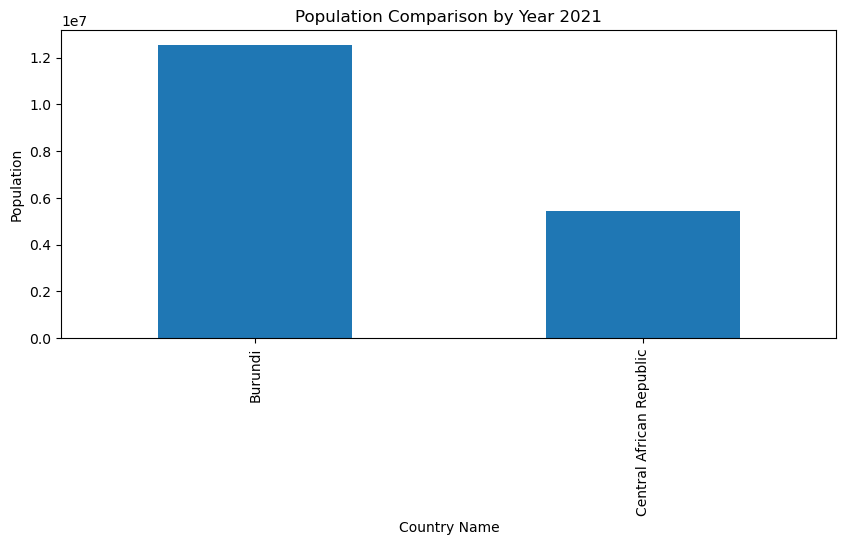

In [6]:
# Create a bar chart of the population of the top two poorest countries in 2021
temp["2021"].plot(kind="bar", figsize=(10, 4))
plt.title("Population Comparison by Year 2021")
plt.ylabel("Population")
plt.show()

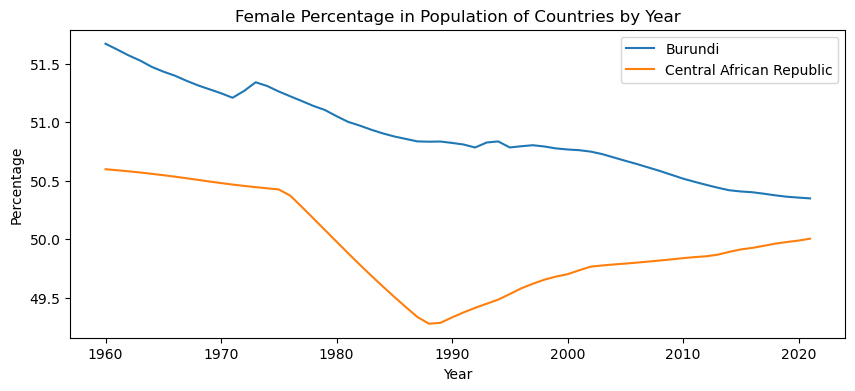

In [7]:
# Get summary statistics for the female population percentage indicator for the top two poorest countries
indicator = "Population, female (% of total population)"

temp = years_df.reset_index()
temp = temp[temp["Country Name"].isin(countries)]
temp = temp[temp["Indicator Name"] == indicator].drop(["Country Code", "Indicator Code", "Indicator Name"], axis=1).set_index("Country Name")
temp.T.plot(kind="line", figsize=(10, 4))
plt.title("Female Percentage in Population of Countries by Year")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend()
plt.show()

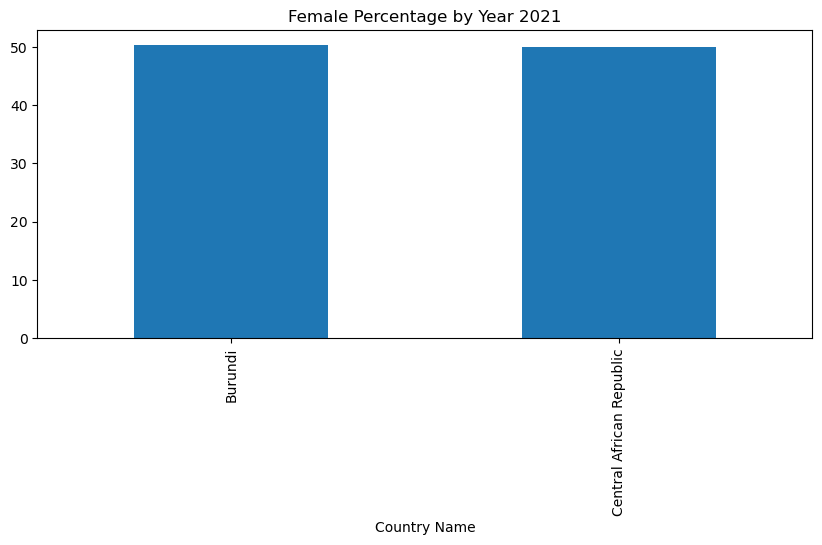

In [8]:
# Create a bar chart of the female population percentage of the top two poorest countries in 2021
temp["2021"].plot(kind="bar", figsize=(10, 4))
plt.title("Female Percentage by Year 2021")
plt.show()

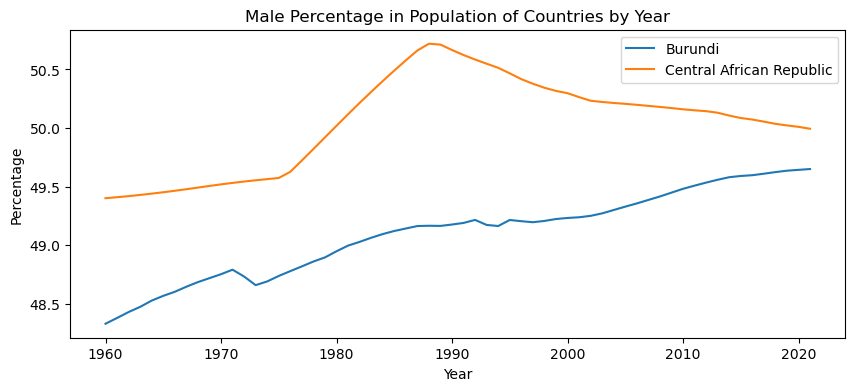

In [9]:
# Get summary statistics for the male population percentage indicator for the top two poorest countries
indicator = "Population, male (% of total population)"

temp = years_df.reset_index()
temp = temp[temp["Country Name"].isin(countries)]
temp = temp[temp["Indicator Name"] == indicator].drop(["Country Code", "Indicator Code", "Indicator Name"], axis=1).set_index("Country Name")
temp.T.plot(kind="line", figsize=(10, 4))
plt.title("Male Percentage in Population of Countries by Year")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.legend()
plt.show()

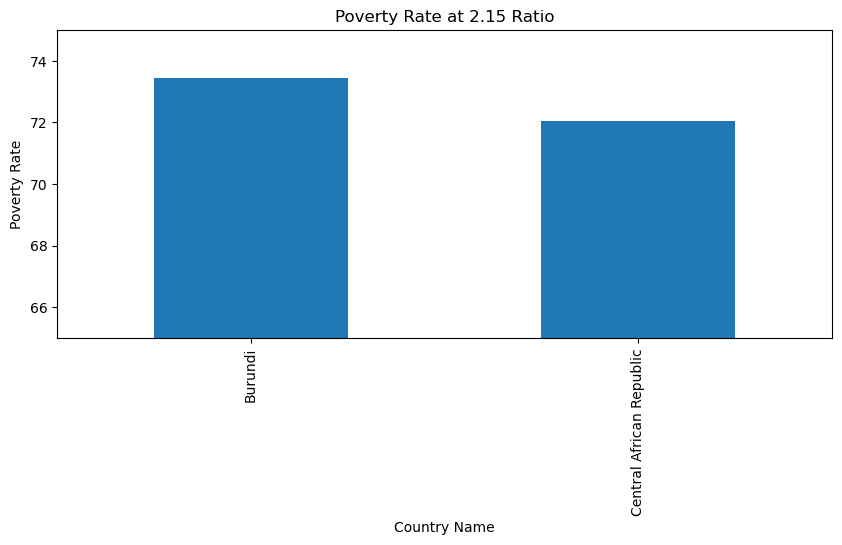

In [10]:
# Get the median poverty rate at $2.15 a day for the top two poorest countries
indicators = ['Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)']

temp = years_df.reset_index()
temp = temp[temp["Country Name"].isin(countries)]
temp = temp[temp["Indicator Name"].isin(indicators)].drop(["Country Code", "Indicator Code", "Indicator Name"], axis=1).set_index(["Country Name"]).T

temp.median().plot(kind="bar", figsize=(10, 4))
plt.title("Poverty Rate at 2.15 Ratio")
plt.ylabel("Poverty Rate")
plt.ylim(65, 75)
plt.show()

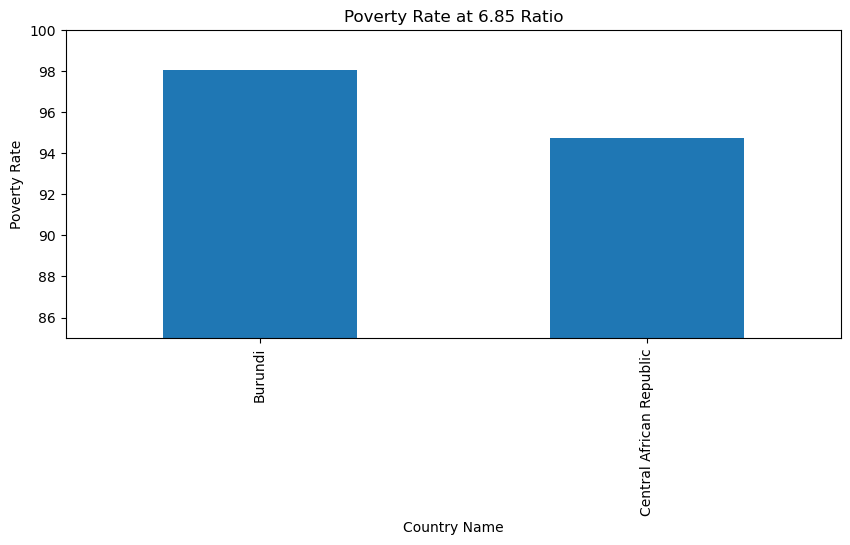

In [11]:
# Get the median poverty rate at $6.85 a day for the top two poorest countries
indicators = ['Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population)']

temp = years_df.reset_index()
temp = temp[temp["Country Name"].isin(countries)]
temp = temp[temp["Indicator Name"].isin(indicators)].drop(["Country Code", "Indicator Code", "Indicator Name"], axis=1).set_index(["Country Name"]).T

temp.median().plot(kind="bar", figsize=(10, 4))
plt.title("Poverty Rate at 6.85 Ratio")
plt.ylabel("Poverty Rate")
plt.ylim(85, 100)
plt.show()